In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn import svm
import pickle as pk

In [2]:
# Load the dataset
data = pd.read_csv(r'/Users/snrt1/Desktop/TV_Laayoune_Data_CIAUMED.csv')

In [3]:
del data["Unnamed: 0"]

In [4]:
data

Program          Genre  Number of viewers  Audience share (%)  \
0                 Hiraf        Capsule             163000                22.0   
1      Midadou chouaara       Culturel             868000                13.8   
2            Fada Ryadi          Sport             681000                 9.7   
3      Journal Télévisé           Info             615000                44.9   
4                Agenda           Info             868000                36.8   
...                 ...            ...                ...                 ...   
5135              Amnir  documentaires              10344                48.0   
5136  Kadaya ramadaniya      Religieux               9994                47.0   
5137              Hiraf        Capsule               9299                30.0   
5138  Konoz mina sahrae       Culturel               9669                10.0   
5139              Amnir  documentaires               8997                20.0   

     Start time Broadcasting date  
0      21:15:00        2023-03-21  
1      06:17:00        2023-03-20  
2      07:10:00        2023-03-19  
3      22:30:00        2023-03-18  
4      19:39:00        2023-03-17  
...         ...               ...  
5135   15:31:17        2021-12-03  
5136   15:09:28        2021-05-30  
5137   13:45:15        2021-07-30  
5138   07:24:00        2022-10-25  
5139   11:51:54        2021-09-05  

[5140 rows x 6 columns]

<AxesSubplot:>

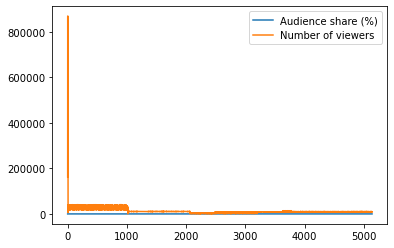

In [5]:
data[["Audience share (%)","Number of viewers"]].plot()

In [6]:
data.dtypes

Program                object
Genre                  object
Number of viewers       int64
Audience share (%)    float64
Start time             object
Broadcasting date      object
dtype: object

In [7]:
data.isnull().sum()

Program               0
Genre                 0
Number of viewers     0
Audience share (%)    0
Start time            0
Broadcasting date     0
dtype: int64

<AxesSubplot:>

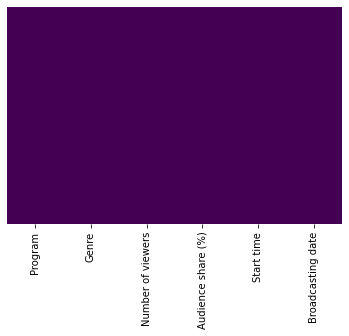

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
data.duplicated().sum()

0

# No duplicate values found!

In [10]:
data

Program          Genre  Number of viewers  Audience share (%)  \
0                 Hiraf        Capsule             163000                22.0   
1      Midadou chouaara       Culturel             868000                13.8   
2            Fada Ryadi          Sport             681000                 9.7   
3      Journal Télévisé           Info             615000                44.9   
4                Agenda           Info             868000                36.8   
...                 ...            ...                ...                 ...   
5135              Amnir  documentaires              10344                48.0   
5136  Kadaya ramadaniya      Religieux               9994                47.0   
5137              Hiraf        Capsule               9299                30.0   
5138  Konoz mina sahrae       Culturel               9669                10.0   
5139              Amnir  documentaires               8997                20.0   

     Start time Broadcasting date  
0      21:15:00        2023-03-21  
1      06:17:00        2023-03-20  
2      07:10:00        2023-03-19  
3      22:30:00        2023-03-18  
4      19:39:00        2023-03-17  
...         ...               ...  
5135   15:31:17        2021-12-03  
5136   15:09:28        2021-05-30  
5137   13:45:15        2021-07-30  
5138   07:24:00        2022-10-25  
5139   11:51:54        2021-09-05  

[5140 rows x 6 columns]

In [11]:
data.Genre.value_counts()

Culturel         2032
Info             1041
Music             500
Religieux         369
Capsule           362
Politique         262
Sport             217
documentaires     188
Series            169
Name: Genre, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Capsule'),
 Text(1, 0, 'Culturel'),
 Text(2, 0, 'Sport'),
 Text(3, 0, 'Info'),
 Text(4, 0, 'Music'),
 Text(5, 0, 'documentaires'),
 Text(6, 0, 'Religieux'),
 Text(7, 0, 'Politique'),
 Text(8, 0, 'Series')]

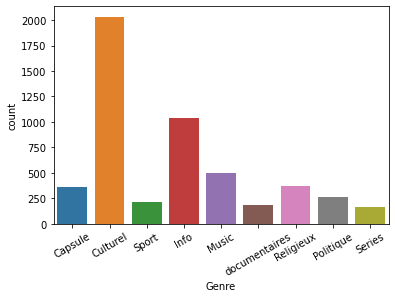

In [12]:
ax= sns.countplot(data['Genre'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

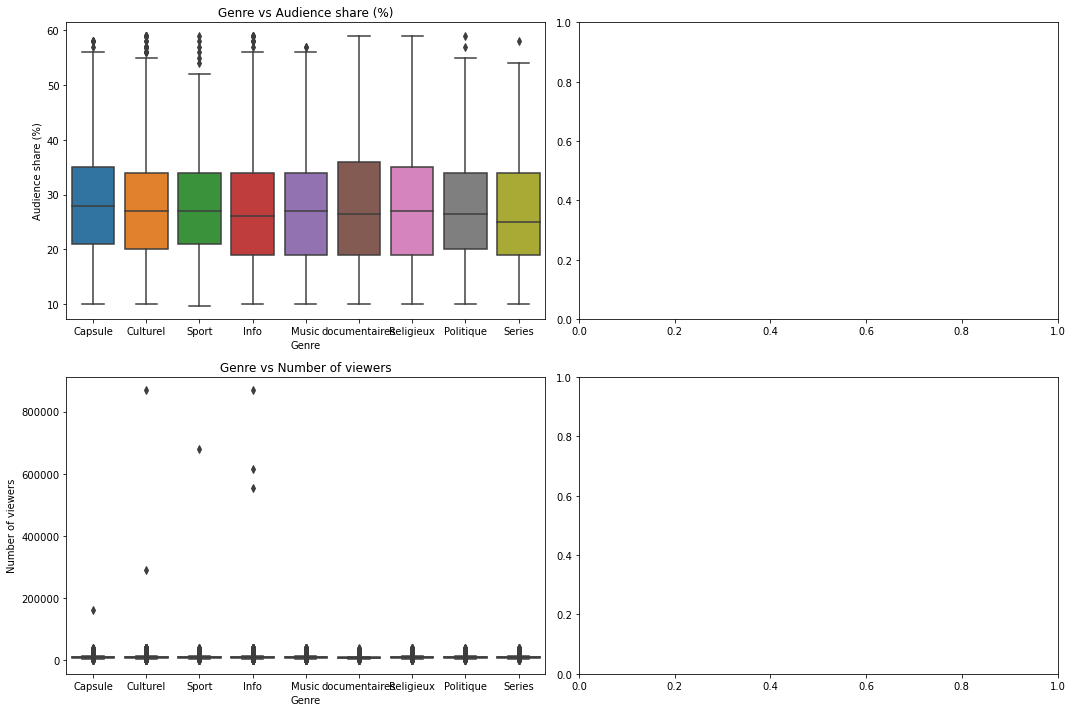

In [13]:
fig,ax = plt.subplots(2,2,figsize = (15,10))

sns.boxplot(x = 'Genre', y = 'Audience share (%)', data = data,ax=ax[0,0])
ax[0,0].set_title('Genre vs Audience share (%)')


sns.boxplot(x = 'Genre', y = 'Number of viewers', data = data,ax=ax[1,0])
ax[1,0].set_title('Genre vs Number of viewers')

plt.tight_layout()
plt.show()

In [14]:
# Convert non-numeric data to numeric data using one-hot encoding
data = pd.get_dummies(data, columns=["Genre"])

In [15]:
data.head()

Program  Number of viewers  Audience share (%) Start time  \
0             Hiraf             163000                22.0   21:15:00   
1  Midadou chouaara             868000                13.8   06:17:00   
2        Fada Ryadi             681000                 9.7   07:10:00   
3  Journal Télévisé             615000                44.9   22:30:00   
4            Agenda             868000                36.8   19:39:00   

  Broadcasting date  Genre_Capsule  Genre_Culturel  Genre_Info  Genre_Music  \
0        2023-03-21              1               0           0            0   
1        2023-03-20              0               1           0            0   
2        2023-03-19              0               0           0            0   
3        2023-03-18              0               0           1            0   
4        2023-03-17              0               0           1            0   

   Genre_Politique  Genre_Religieux  Genre_Series  Genre_Sport  \
0                0                0             0            0   
1                0                0             0            0   
2                0                0             0            1   
3                0                0             0            0   
4                0                0             0            0   

   Genre_documentaires  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

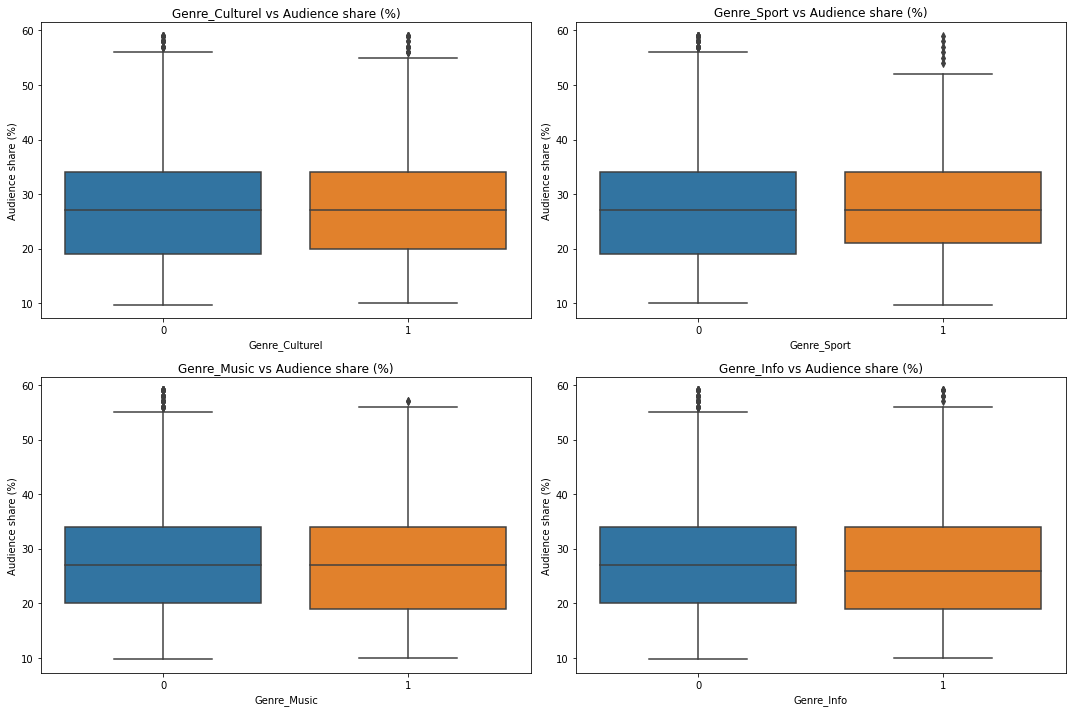

In [16]:
fig,ax = plt.subplots(2,2,figsize = (15,10))

sns.boxplot(x = 'Genre_Culturel', y = 'Audience share (%)', data = data,ax=ax[0,0])
ax[0,0].set_title('Genre_Culturel vs Audience share (%)')

sns.boxplot(x = 'Genre_Sport', y = 'Audience share (%)', data = data,ax=ax[0,1])
ax[0,1].set_title('Genre_Sport vs Audience share (%)')

sns.boxplot(x = 'Genre_Music', y = 'Audience share (%)', data = data,ax=ax[1,0])
ax[1,0].set_title('Genre_Music vs Audience share (%)')

sns.boxplot(x = 'Genre_Info', y = 'Audience share (%)', data = data,ax=ax[1,1])
ax[1,1].set_title('Genre_Info vs Audience share (%)')

plt.tight_layout()
plt.show()

In [17]:
data['Broadcasting date'] = data['Broadcasting date'].astype('datetime64[ns]')

In [18]:
data.dtypes

Program                        object
Number of viewers               int64
Audience share (%)            float64
Start time                     object
Broadcasting date      datetime64[ns]
Genre_Capsule                   uint8
Genre_Culturel                  uint8
Genre_Info                      uint8
Genre_Music                     uint8
Genre_Politique                 uint8
Genre_Religieux                 uint8
Genre_Series                    uint8
Genre_Sport                     uint8
Genre_documentaires             uint8
dtype: object

In [19]:
data.head()

Program  Number of viewers  Audience share (%) Start time  \
0             Hiraf             163000                22.0   21:15:00   
1  Midadou chouaara             868000                13.8   06:17:00   
2        Fada Ryadi             681000                 9.7   07:10:00   
3  Journal Télévisé             615000                44.9   22:30:00   
4            Agenda             868000                36.8   19:39:00   

  Broadcasting date  Genre_Capsule  Genre_Culturel  Genre_Info  Genre_Music  \
0        2023-03-21              1               0           0            0   
1        2023-03-20              0               1           0            0   
2        2023-03-19              0               0           0            0   
3        2023-03-18              0               0           1            0   
4        2023-03-17              0               0           1            0   

   Genre_Politique  Genre_Religieux  Genre_Series  Genre_Sport  \
0                0                0             0            0   
1                0                0             0            0   
2                0                0             0            1   
3                0                0             0            0   
4                0                0             0            0   

   Genre_documentaires  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [20]:
# Convert the "Broadcasting date" column to datetime format
data["Broadcasting date"] = pd.to_datetime(data["Broadcasting date"], format="%d/%m/%Y")

In [21]:
data.dtypes

Program                        object
Number of viewers               int64
Audience share (%)            float64
Start time                     object
Broadcasting date      datetime64[ns]
Genre_Capsule                   uint8
Genre_Culturel                  uint8
Genre_Info                      uint8
Genre_Music                     uint8
Genre_Politique                 uint8
Genre_Religieux                 uint8
Genre_Series                    uint8
Genre_Sport                     uint8
Genre_documentaires             uint8
dtype: object

In [22]:
data.head()

Program  Number of viewers  Audience share (%) Start time  \
0             Hiraf             163000                22.0   21:15:00   
1  Midadou chouaara             868000                13.8   06:17:00   
2        Fada Ryadi             681000                 9.7   07:10:00   
3  Journal Télévisé             615000                44.9   22:30:00   
4            Agenda             868000                36.8   19:39:00   

  Broadcasting date  Genre_Capsule  Genre_Culturel  Genre_Info  Genre_Music  \
0        2023-03-21              1               0           0            0   
1        2023-03-20              0               1           0            0   
2        2023-03-19              0               0           0            0   
3        2023-03-18              0               0           1            0   
4        2023-03-17              0               0           1            0   

   Genre_Politique  Genre_Religieux  Genre_Series  Genre_Sport  \
0                0                0             0            0   
1                0                0             0            0   
2                0                0             0            1   
3                0                0             0            0   
4                0                0             0            0   

   Genre_documentaires  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [23]:
# Create separate columns for year, month, and day
data["Broadcasting year"] = data["Broadcasting date"].dt.year
data["Broadcasting month"] = data["Broadcasting date"].dt.month
data["Broadcasting day"] = data["Broadcasting date"].dt.day

# Convert the "Start time" column to datetime format
data["Start time"] = pd.to_datetime(data["Start time"], format="%H:%M:%S")

# Create separate columns for hour, minute, and second
data["Start hour"] = data["Start time"].dt.hour
data["Start minute"] = data["Start time"].dt.minute
data["Start second"] = data["Start time"].dt.second

In [24]:
data.head()

Program  Number of viewers  Audience share (%)  \
0             Hiraf             163000                22.0   
1  Midadou chouaara             868000                13.8   
2        Fada Ryadi             681000                 9.7   
3  Journal Télévisé             615000                44.9   
4            Agenda             868000                36.8   

           Start time Broadcasting date  Genre_Capsule  Genre_Culturel  \
0 1900-01-01 21:15:00        2023-03-21              1               0   
1 1900-01-01 06:17:00        2023-03-20              0               1   
2 1900-01-01 07:10:00        2023-03-19              0               0   
3 1900-01-01 22:30:00        2023-03-18              0               0   
4 1900-01-01 19:39:00        2023-03-17              0               0   

   Genre_Info  Genre_Music  Genre_Politique  Genre_Religieux  Genre_Series  \
0           0            0                0                0             0   
1           0            0                0                0             0   
2           0            0                0                0             0   
3           1            0                0                0             0   
4           1            0                0                0             0   

   Genre_Sport  Genre_documentaires  Broadcasting year  Broadcasting month  \
0            0                    0               2023                   3   
1            0                    0               2023                   3   
2            1                    0               2023                   3   
3            0                    0               2023                   3   
4            0                    0               2023                   3   

   Broadcasting day  Start hour  Start minute  Start second  
0                21          21            15             0  
1                20           6            17             0  
2                19           7            10             0  
3                18          22            30             0  
4                17          19            39             0

In [25]:
len(data.Program.value_counts())

30

In [26]:
data.Program.unique()

array(['Hiraf', 'Midadou chouaara', 'Fada Ryadi', 'Journal Télévisé',
       'Agenda', 'Sahafatou Al ousbouaa', 'Touratak Lak', 'Tarab',
       'Nabdou Al Moujtamaa', 'Mina Dakira sahraouya', 'Mara oa Al Hayat',
       'Amnir', 'Kadaya ramadaniya', 'Konoz mina sahrae',
       'Sahil aljanoubi', 'Maa Nass', 'Mina alassima',
       'Aljamal bima hamal', 'samar albidan', 'Assrisser Dahbo',
       'Makam mina tarab hassani', 'layali lafrig',
       'bissmilahi lahi namdeh', 'alfich', 'sibak kawafi', 'Quiz Quran',
       'Maa Naha', 'Mahadra', 'Mahattat', 'Oum Rjal'], dtype=object)

In [27]:
Max_Program = data['Program'].value_counts().sort_values(ascending=False)[0:20]
Max_Program.name = 'Count'
Max_Program.index.name = 'Programs'

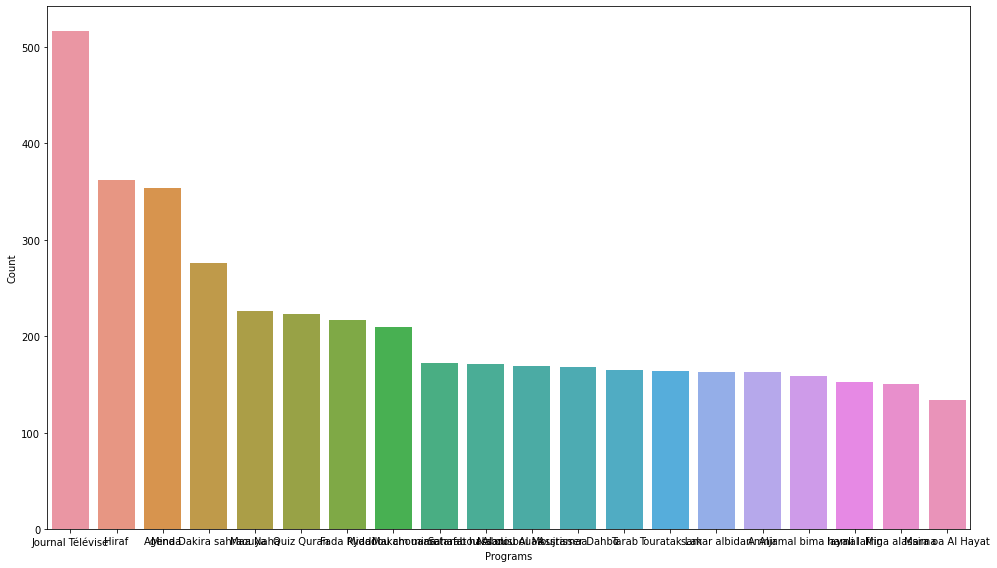

In [28]:
fig = plt.figure(figsize=(14,8))
sns.barplot(x=Max_Program.index,y= Max_Program)
plt.tight_layout()

In [29]:
data.Genre_Culturel.value_counts()

0    3108
1    2032
Name: Genre_Culturel, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre_Culturel', ylabel='count'>

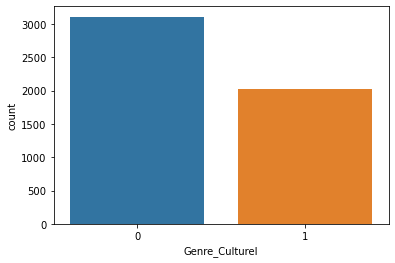

In [30]:
sns.countplot(data['Genre_Culturel'])

In [31]:
data.columns

Index(['Program', 'Number of viewers', 'Audience share (%)', 'Start time',
       'Broadcasting date', 'Genre_Capsule', 'Genre_Culturel', 'Genre_Info',
       'Genre_Music', 'Genre_Politique', 'Genre_Religieux', 'Genre_Series',
       'Genre_Sport', 'Genre_documentaires', 'Broadcasting year',
       'Broadcasting month', 'Broadcasting day', 'Start hour', 'Start minute',
       'Start second'],
      dtype='object')

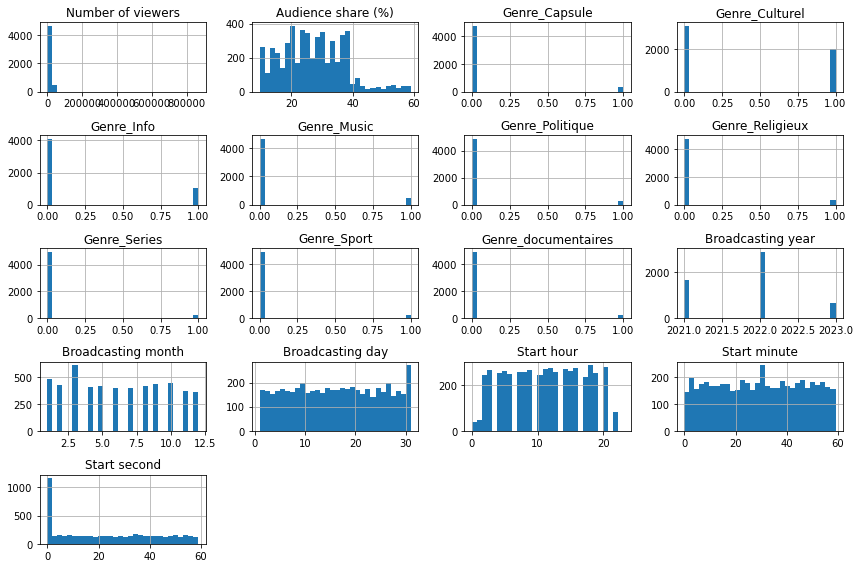

In [32]:
data.hist(figsize=(12,8),bins=30)
plt.tight_layout()

In [33]:
def bivariate_analysis(x):
    plt.figure(figsize=(10,6))
    ax = sns.regplot(x=x, y='Number of viewers',data=data)
    ax.set_title("Used "+x, fontsize=25)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylabel('Number of viewers', fontsize=20)
    plt.locator_params(axis='x', nbins=10)

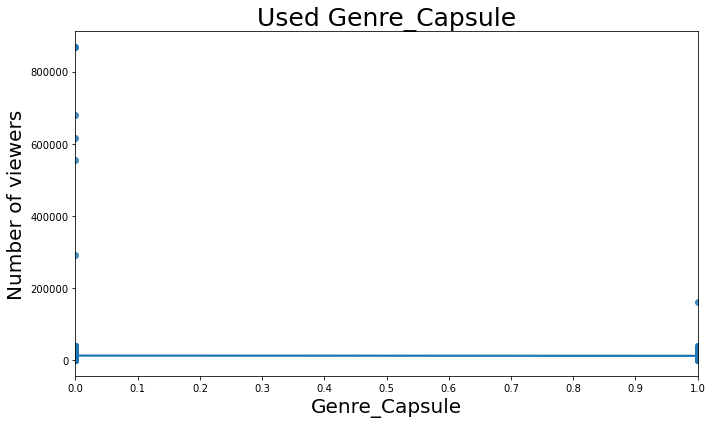

In [34]:
bivariate_analysis("Genre_Capsule")
plt.tight_layout()

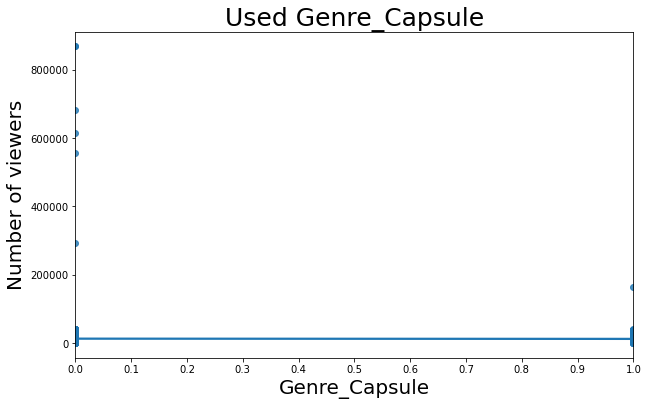

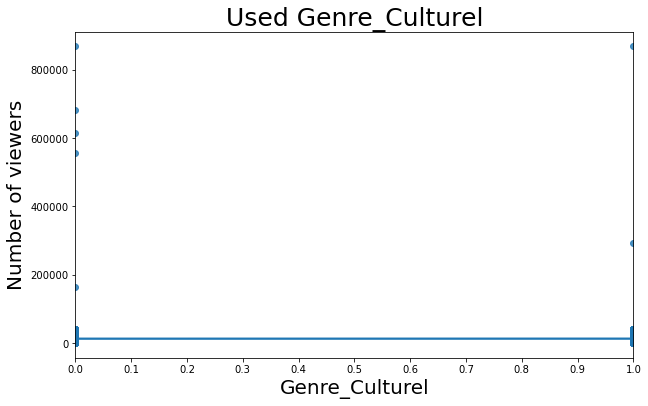

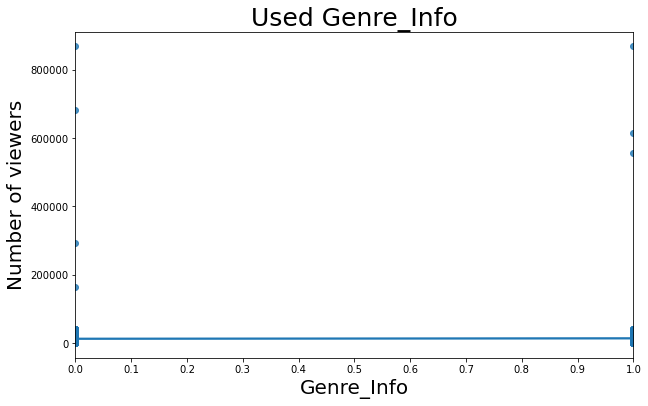

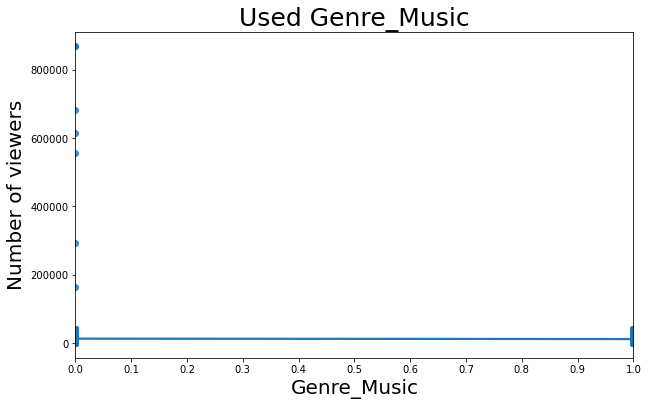

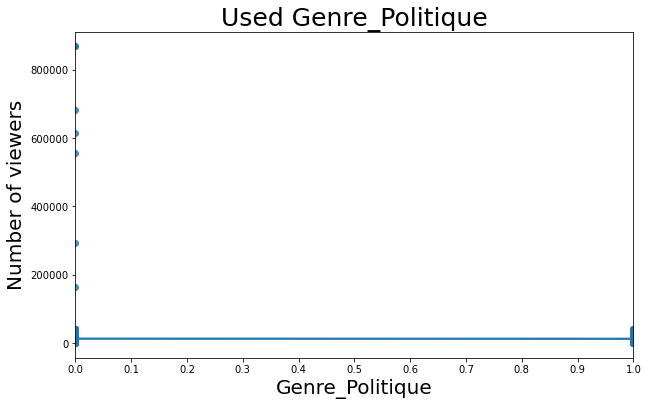

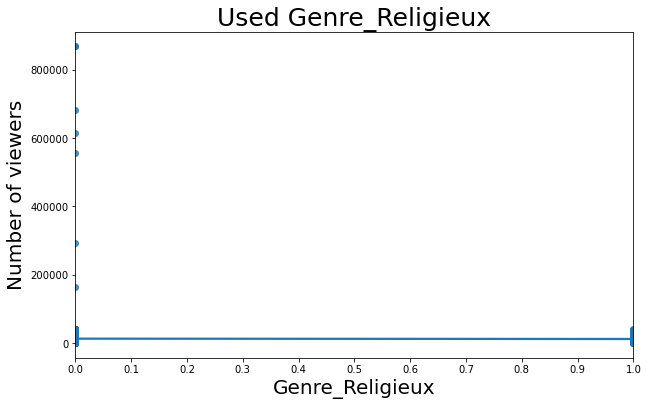

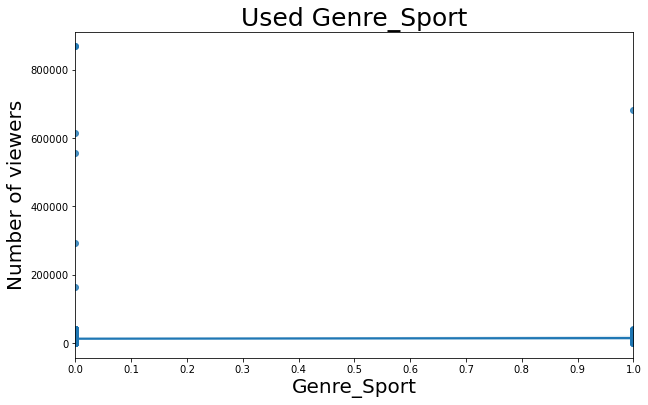

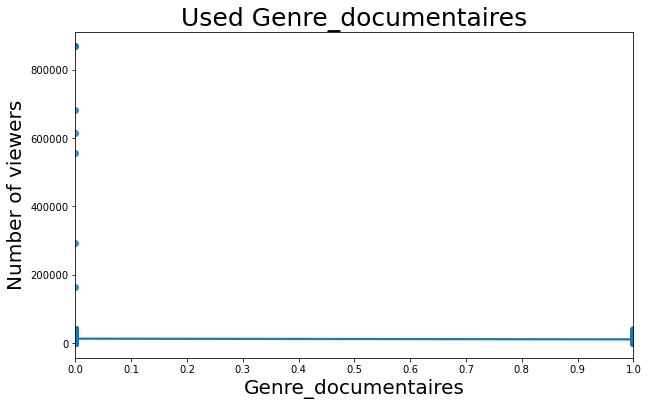

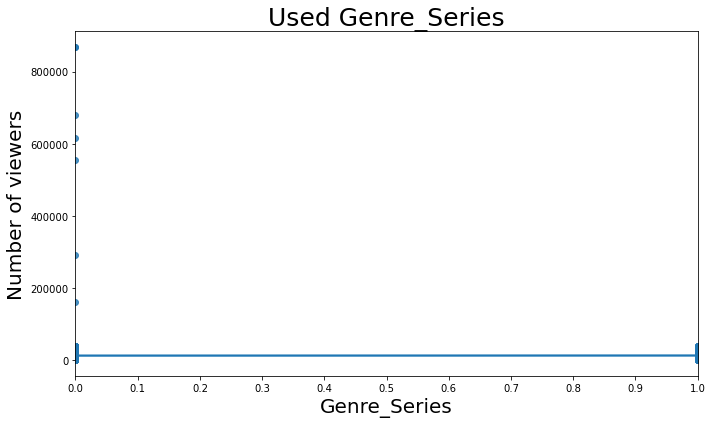

In [35]:
cols = ["Genre_Capsule", "Genre_Culturel","Genre_Info","Genre_Music","Genre_Politique","Genre_Religieux","Genre_Sport", "Genre_documentaires","Genre_Series"]
for x in cols:
    bivariate_analysis(x)
plt.tight_layout()

<AxesSubplot:>

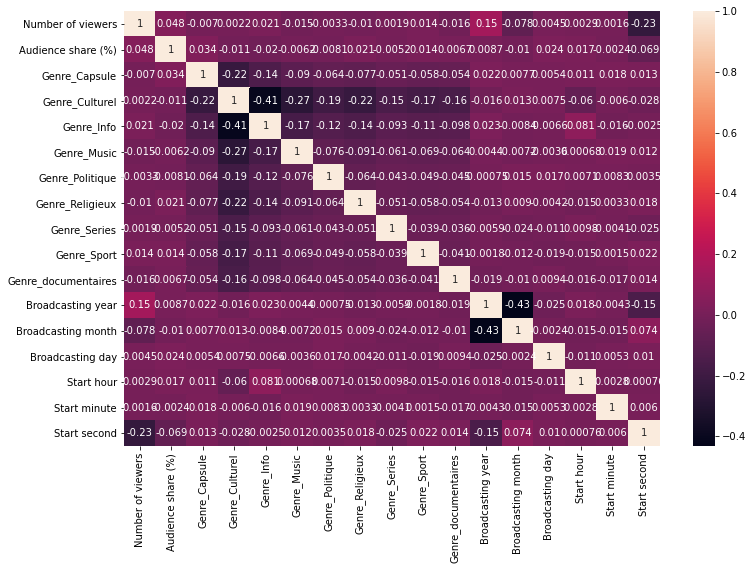

In [36]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [37]:
# Split the data into training and testing sets
X = data.drop([ "Program","Genre_Capsule","Genre_Culturel" ,"Genre_Info","Genre_Music","Genre_Politique","Genre_Religieux","Genre_Sport","Genre_documentaires","Genre_Series", "Broadcasting date", "Start time"], axis=1)
y = data[["Audience share (%)"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# check the performance on diffrent regressor
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))



names = ["Linear Regression", "Ridge", "KNN", "Random Forest", "Decision Tree"]



train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    #print('Max errors : ', m_errors)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
   # print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
comp = pd.DataFrame({"Training Score": train_l, "Testing Score": test_l, "MAE": mae_l, "RMSE": rmse_l, "R2 Score": r2_l})
comp




+ ==================================================================================================== +
			1-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  1.9503367957948348e-14
--------------------------------------------------
Mean absolute error (MAE) :  1.622739988210871e-14
--------------------------------------------------
--------------------------------------------------
R2 score :  1.0
--------------------------------------------------
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (LinearRegression) : 1.679 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For Ridge The Performance result is: 
+ =======

<ipython-input-38-351fe9ffed96>:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.0075892228523047065
--------------------------------------------------
Mean absolute error (MAE) :  0.0006605058365758257
--------------------------------------------------
--------------------------------------------------
R2 score :  0.9999994626203488
--------------------------------------------------
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (Random Forest) : 0.51 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Decision Tree The Performance result

Training Score  Testing Score           MAE          RMSE  R2 Score
0        1.000000       1.000000  1.622740e-14  1.950337e-14  1.000000
1        1.000000       1.000000  1.981823e-05  2.457832e-05  1.000000
2        0.664153       0.491934  5.898872e+00  7.379327e+00  0.491934
3        1.000000       0.999999  6.605058e-04  7.589223e-03  0.999999
4        1.000000       0.999963  4.085603e-03  6.268940e-02  0.999963

In [39]:
comp

Training Score  Testing Score           MAE          RMSE  R2 Score
0        1.000000       1.000000  1.622740e-14  1.950337e-14  1.000000
1        1.000000       1.000000  1.981823e-05  2.457832e-05  1.000000
2        0.664153       0.491934  5.898872e+00  7.379327e+00  0.491934
3        1.000000       0.999999  6.605058e-04  7.589223e-03  0.999999
4        1.000000       0.999963  4.085603e-03  6.268940e-02  0.999963

Text(0.5, 1.0, 'MSE Comparison of Regression Models')

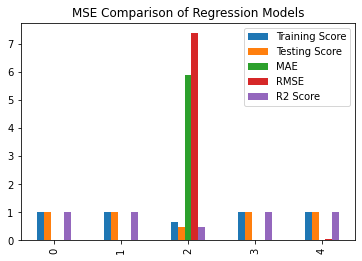

In [40]:
comp.plot(kind = 'bar')
plt.title("MSE Comparison of Regression Models")


In [41]:
comp.RMSE[:]

0    1.950337e-14
1    2.457832e-05
2    7.379327e+00
3    7.589223e-03
4    6.268940e-02
Name: RMSE, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (5,).

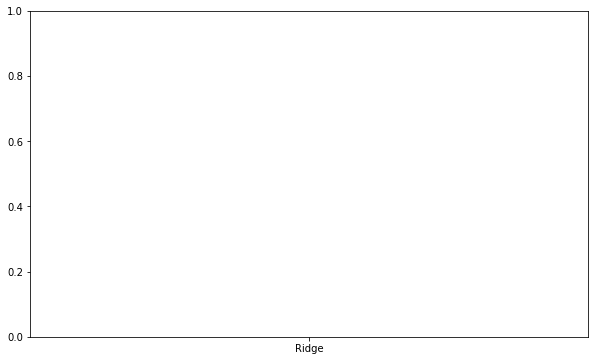

In [42]:
import matplotlib.pyplot as plt

# Create list of MSEs and model names
comps = comp.RMSE[:]
models = ["Ridge","Linear Regression", "KNN","Random Forest", "Decision Tree", "Gradient Descent", "Neural Network","svm"]



# Plot bar chart of MSEs
fig, ax1 = plt.subplots(figsize=(10, 6))
# Set colors for each bar
colors = ['blue', 'orange', 'green', 'red', 'purple','green', 'red', 'purple']

ax1.bar(models, comps, color=colors)
ax1.set_xlabel("Model")
ax1.set_ylabel("MSE")

# Create secondary axis for MSE values
ax2 = ax1.twinx()
ax2.set_ylabel("MSE Values")
ax2.plot(models, comps, 'o-', color='black', linewidth=2, markersize=12)

plt.title("MSE Comparison of Regression Models")
plt.show()


In [44]:
# Split the data into training and testing sets
X = data.drop([ "Program","Genre_Capsule","Genre_Culturel" ,"Genre_Info","Genre_Music","Genre_Politique","Genre_Religieux","Genre_Sport","Genre_documentaires","Genre_Series", "Broadcasting date", "Start time"], axis=1)
y = data["Number of viewers"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Stochastic Gradient Descent', SGDRegressor()))
models.append(('Neural Network', MLPRegressor()))
models.append(('SVM', SVR()))

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    #print('Max errors : ', m_errors)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
   # print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
comp = pd.DataFrame({"Training Score": train_l, "Testing Score": test_l, "MAE": mae_l, "RMSE": rmse_l, "R2 Score": r2_l})
comp

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  2.6974315182376003e-09
--------------------------------------------------
Mean absolute error (MAE) :  2.1626722341193182e-09
--------------------------------------------------
--------------------------------------------------
R2 score :  1.0
--------------------------------------------------
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (Ridge) : 0.011 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ =================

Training Score  Testing Score           MAE          RMSE      R2 Score
0    1.000000e+00   1.000000e+00  2.162672e-09  2.697432e-09  1.000000e+00
1    1.000000e+00   1.000000e+00  2.051450e-12  2.374306e-12  1.000000e+00
2    9.665811e-01   9.999982e-01  7.585409e+00  1.243153e+01  9.999982e-01
3    9.945262e-01   9.855094e-01  4.047420e+01  1.104226e+03  9.855094e-01
4    1.000000e+00   9.999915e-01  1.085409e+01  2.674501e+01  9.999915e-01
5   -5.806793e+26  -1.371324e+27  2.761350e+17  3.396923e+17 -1.371324e+27
6    9.999997e-01   9.999980e-01  1.000592e+01  1.293976e+01  9.999980e-01
7   -8.654474e-03  -2.901345e-02  5.330420e+03  9.305209e+03 -2.901345e-02

In [46]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
X_train_Prediction = linear_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_Prediction))
print("R2 Score : ",r2_score(y_train,X_train_Prediction))

MSE :  4.2774083794341e-23
R2 Score :  1.0


In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 5.637330420971038e-24


In [401]:
cross_linear = cross_val_score(linear_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_linear = np.mean(cross_linear)
print(mean_cross_linear)

-9.139554968438496e-23


In [402]:
# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

# Calculate number of observations and features
n_obs = len(X_test)
n_features = X_test.shape[1]

# Calculate adjusted R2
adj_r2 = 1 - ((1 - r2) * (n_obs - 1)) / (n_obs - n_features - 1)
print("Adjusted R2 score:", adj_r2)

R2 score: 1.0
Adjusted R2 score: 1.0


In [403]:
print("Coefficient values:", lr.coef_)
print("Intercept value:", lr.intercept_)

Coefficient values: [ 1.00000000e+00 -8.99621150e-15  1.33003891e-13 -3.32999230e-15
 -6.85596953e-15 -2.97101927e-15 -2.14484985e-15 -1.04811979e-14]
Intercept value: -2.7284841053187847e-10


In [48]:
data.head()

Program  Number of viewers  Audience share (%)  \
0             Hiraf             163000                22.0   
1  Midadou chouaara             868000                13.8   
2        Fada Ryadi             681000                 9.7   
3  Journal Télévisé             615000                44.9   
4            Agenda             868000                36.8   

           Start time Broadcasting date  Genre_Capsule  Genre_Culturel  \
0 1900-01-01 21:15:00        2023-03-21              1               0   
1 1900-01-01 06:17:00        2023-03-20              0               1   
2 1900-01-01 07:10:00        2023-03-19              0               0   
3 1900-01-01 22:30:00        2023-03-18              0               0   
4 1900-01-01 19:39:00        2023-03-17              0               0   

   Genre_Info  Genre_Music  Genre_Politique  Genre_Religieux  Genre_Series  \
0           0            0                0                0             0   
1           0            0                0                0             0   
2           0            0                0                0             0   
3           1            0                0                0             0   
4           1            0                0                0             0   

   Genre_Sport  Genre_documentaires  Broadcasting year  Broadcasting month  \
0            0                    0               2023                   3   
1            0                    0               2023                   3   
2            1                    0               2023                   3   
3            0                    0               2023                   3   
4            0                    0               2023                   3   

   Broadcasting day  Start hour  Start minute  Start second  
0                21          21            15             0  
1                20           6            17             0  
2                19           7            10             0  
3                18          22            30             0  
4                17          19            39             0

In [49]:
data

Program  Number of viewers  Audience share (%)  \
0                 Hiraf             163000                22.0   
1      Midadou chouaara             868000                13.8   
2            Fada Ryadi             681000                 9.7   
3      Journal Télévisé             615000                44.9   
4                Agenda             868000                36.8   
...                 ...                ...                 ...   
5135              Amnir              10344                48.0   
5136  Kadaya ramadaniya               9994                47.0   
5137              Hiraf               9299                30.0   
5138  Konoz mina sahrae               9669                10.0   
5139              Amnir               8997                20.0   

              Start time Broadcasting date  Genre_Capsule  Genre_Culturel  \
0    1900-01-01 21:15:00        2023-03-21              1               0   
1    1900-01-01 06:17:00        2023-03-20              0               1   
2    1900-01-01 07:10:00        2023-03-19              0               0   
3    1900-01-01 22:30:00        2023-03-18              0               0   
4    1900-01-01 19:39:00        2023-03-17              0               0   
...                  ...               ...            ...             ...   
5135 1900-01-01 15:31:17        2021-12-03              0               0   
5136 1900-01-01 15:09:28        2021-05-30              0               0   
5137 1900-01-01 13:45:15        2021-07-30              1               0   
5138 1900-01-01 07:24:00        2022-10-25              0               1   
5139 1900-01-01 11:51:54        2021-09-05              0               0   

      Genre_Info  Genre_Music  Genre_Politique  Genre_Religieux  Genre_Series  \
0              0            0                0                0             0   
1              0            0                0                0             0   
2              0            0                0                0             0   
3              1            0                0                0             0   
4              1            0                0                0             0   
...          ...          ...              ...              ...           ...   
5135           0            0                0                0             0   
5136           0            0                0                1             0   
5137           0            0                0                0             0   
5138           0            0                0                0             0   
5139           0            0                0                0             0   

      Genre_Sport  Genre_documentaires  Broadcasting year  Broadcasting month  \
0               0                    0               2023                   3   
1               0                    0               2023                   3   
2               1                    0               2023                   3   
3               0                    0               2023                   3   
4               0                    0               2023                   3   
...           ...                  ...                ...                 ...   
5135            0                    1               2021                  12   
5136            0                    0               2021                   5   
5137            0                    0               2021                   7   
5138            0                    0               2022                  10   
5139            0                    1               2021                   9   

      Broadcasting day  Start hour  Start minute  Start second  
0                   21          21            15             0  
1                   20           6            17             0  
2                   19           7            10             0  
3                   18          22            30             0  
4                   17     

In [50]:
# Stochastic Gradient Descent
# Split the data into training and testing sets
X = data.drop([ "Program","Genre_Capsule","Genre_Culturel" ,"Genre_Info","Genre_Music","Genre_Politique","Genre_Religieux","Genre_Sport","Genre_documentaires","Genre_Series", "Broadcasting date", "Start time"], axis=1)
y = data["Number of viewers"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred_scaled_sgd = sgd.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_scaled_sgd)
print("SGD MSE:", mse_sgd)

SGD MSE: 7.101161692022132e+33


In [51]:
clf = svm.SVC(kernel='linear') # Linear Kernel
X = data.drop([ "Program","Genre_Capsule","Genre_Culturel" ,"Genre_Info","Genre_Music","Genre_Politique","Genre_Religieux","Genre_Sport","Genre_documentaires","Genre_Series", "Broadcasting date", "Start time"], axis=1)
y = data["Number of viewers"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred)
print("SVM MSE:", mse_svm)

SVM MSE: 187.82782101167317


In [52]:
# Neural Network
nn = MLPRegressor()
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred)
print("Neural Network MSE:", mse_nn)

Neural Network MSE: 199.69676132123865


In [ ]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_scaled_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_scaled_dt)
print("Decision Tree MSE:", mse_dt)

In [ ]:
# K Nearest Neighbors
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_scaled_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_scaled_knn)
print("KNN MSE:", mse_knn)

In [ ]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_scaled_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_scaled_rf)
print("Random Forest MSE:", mse_rf)

In [ ]:
svmreg_model = SVR()
svmreg_model.fit(X_train,y_train)
X_train_pred_svmreg = svmreg_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_svmreg))

In [ ]:
cross_svmreg = cross_val_score(svmreg_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_svmreg = np.mean(cross_svmreg)
print(mean_cross_svmreg)

In [ ]:
pk.dump(lr,open("TV_Predictor.pkl",'wb'))

In [ ]:
import matplotlib.pyplot as plt

# Create list of MSEs and model names
mses = [mse, mse_knn, mse_dt, mse_rf, mse_nn]
models = ["Linear Regression", "KNN", "Decision Tree", "Random Forest", "Neural Network"]

# Plot bar chart of MSEs
fig, ax1 = plt.subplots(figsize=(10, 6))
# Set colors for each bar
colors = ['blue', 'orange', 'green', 'red', 'purple']

ax1.bar(models, mses, color=colors)
ax1.set_xlabel("Model")
ax1.set_ylabel("MSE")

# Create secondary axis for MSE values
ax2 = ax1.twinx()
ax2.set_ylabel("MSE Values")
ax2.plot(models, mses, 'o-', color='black', linewidth=2, markersize=12)

plt.title("MSE Comparison of Regression Models")
plt.show()
